데이터셋 : REDwine_quality.csv

##### - 실용경제데이터분석
- REDwine_quality data 분석
- 이한솔

 : 레드와인의 정보 데이터(REDwine_quality data)를 활용해 레드와인의 품질(quality)을 분석해보았고, 
 
 이를 기초하여 레드와인 품질에 영향을 미치는 영향 요소(독립변수) 파악을 진행하였습니다.

    0. 개요
    1. Library & Data Import
        1-1. 데이터 살펴보기
    2. 데이터 분석 (EDA: 탐색적 데이터 분석)
        2-1. 데이터셋 기본 정보 파악하기
        2-2. 종속변수 탐색
        2-3. 독립변수 탐색
        2-4. 독립변수와 종속변수 간의 관계 탐색
          2-4-1. 종속변수별 독립변수의 평균과 중앙값
          2-4-2. 독립변수와 종속변수 간 상관관계 분석
          2-4-3. 모집단의 신뢰구간 구하기
          2-4-4. 부트스트랩
    3. 결론

In [ ]:
### 사용할 라이브러리
import pandas as pd ### 데이터 분석을 하기 위한 파이썬 라이브러리
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import trim_mean
import statsmodels.api as sm

#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# 한글폰트 사용하기 위해서
!apt -qq -y install fonts-nanum > /dev/null

In [ ]:
# 한글폰트 사용하기 위해서

import matplotlib.font_manager as fm
font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font=fm.FontProperties(fname=font_path, size=10)
fm._rebuild()

plt.rc('font', family='NanumBarunGothic')

##1. 사용할 데이터셋 가져오기 : REDwine_quality

In [ ]:
# 데이터셋 import
from google.colab import files
uploaded = files.upload() # REDwine_quality.csv

Saving REDwine_quality.csv to REDwine_quality.csv


In [ ]:
# 데이터셋 읽어오기
df=pd.read_csv('./REDwine_quality.csv')

In [ ]:
# 데이터셋 구성 살펴보기
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


#### 1-1. 데이터 살펴보기 :Features Descriptions

각 변수의 의미는 다음과 같습니다:

    1 - fixed acidity: 고정산도
    2 - volatile acidity: 휘발성 산도
    3 - citric acid: 구연산
    4 - residual sugar: 잔류 설탕
    5 - chlorides: 염화물
    6 - free sulfur dioxide: 유리 이산화황
    7 - total sulfur dioxide: 총 이산화황
    8 - density: 밀도
    9 - pH
    10 - sulphates: 황산염
    11 - alcohol: 알코올
    12 - quality (score between 0 and 10): 품질 (0~10 사이의 점수)

## 2. 데이터 분석 (EDA: 탐색적 데이터 분석)
데이터의 각 변수(features, attributes, columns, x들)의 기본 정보 및 각 변수의 특성


In [ ]:
#그래프 배경 설정
sns.set_style('darkgrid') 

#### 2-1. 데이터 셋의 기본 정보 파악하기

In [ ]:
### 데이터 셋 구조 보기
df.shape
#(행 1599개, 열 12개)

(1599, 12)

In [ ]:
### 결측치 : 비어있는 데이터 찾기
df.isnull().sum() 
#결측치 없음

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
### data type 확인
df.info() 
# quality(int)를 제외한 나머지 열변수는 모두 float(실수형)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
### 숫자형 변수만 뽑아서 기본 통계 나타내기.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### 2-2 종속변수(y)의 탐색 : quality

    - quality : 품질을 종속변수로 설정하였습니다. 레드와인 정보를 바탕으로 레드와인의 품질을 분석할 것이기 때문입니다.

In [ ]:
### quality의 기초 통계량을 다시 살펴본다.

df['quality'].describe()
# 품질의 평균은 약 5.64
# 품질은 3.00(최소값) ~ 8.00(최대값) 사이에 분포하고 있다. 

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


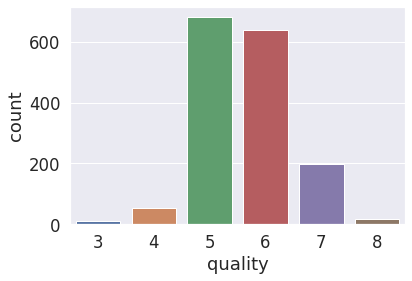

In [ ]:
# quality : 정수 -> 막대그래프로 시각화
sns.countplot('quality',data=df)

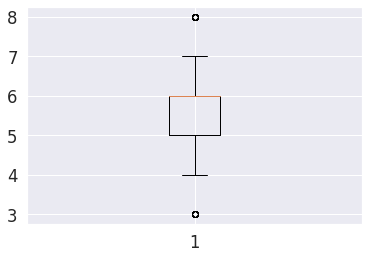

In [ ]:
# 상자그림을 통해 데이터의 분포 및 이상치 파악
plt.boxplot(df['quality']) 
plt.show()
# 주로 5와 6에 분포해있고 이상치(3, 8)가 존재한다.

In [ ]:
# quality의 사분위수 확인
Q0_df = np.percentile(df['quality'], 0) # 최소값, 0사분위수
Q1_df = np.percentile(df['quality'], 25) # 1사분위수
Q2_df = np.percentile(df['quality'], 50) # 중앙값, 2사분위수
Q3_df = np.percentile(df['quality'], 75) # 3사분위수
Q4_df = np.percentile(df['quality'], 100) # 최대값, 4사분위수

print(f'최소값:{Q0_df}, 1사분위수:{Q1_df}, 중앙값:{Q2_df}, 3사분위수:{Q3_df}, 최대값:{Q4_df}')

최소값:3.0, 1사분위수:5.0, 중앙값:6.0, 3사분위수:6.0, 최대값:8.0


In [ ]:
# 사분위수 범위(IQR) : 데이터의 중간 50%에 대한 범위
IQR_df=Q3_df - Q1_df
IQR_df 

1.0

In [ ]:
## 이상치 경계값
upper_df=Q3_df+1.5*IQR_df
lower_df=Q1_df-1.5*IQR_df

upper_df, lower_df
# 7.5보다 크거나 3.5보다 작으면 이상치이다.

(7.5, 3.5)

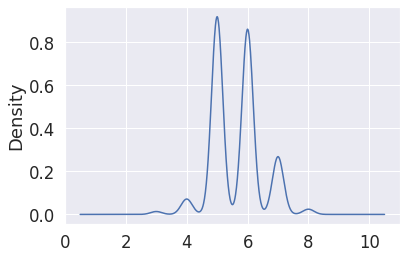

In [ ]:
# 커널밀도함수를 통해 데이터의 밀도 확인
df['quality'].plot(kind='kde')
# 데이터가 5, 6에 상대적으로 더 많이 몰려있다.

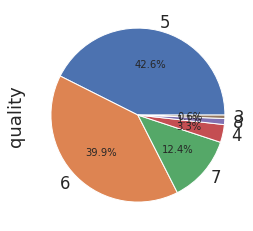

In [ ]:
# pie plot을 통해 데이터의 정확한 분포도(%) 확인
df['quality'].value_counts().plot.pie(autopct='%1.1f%%')
# quality는 '5'가 42.6%, '6'이 39.9%, '7'이 12.4% 분포한다.

In [ ]:
# 해설) quality는 3~8 사이에 분포되어있고 6의 비중이 39.9%로 가장 크다.

#### 2-3 독립변수(features, x) 살펴보기
    - 각 설명변수의 특징 파악하기(시각화)
    - quality : 품질을 제외한 나머지 열변수(레드와인 정보) 모두를 독립변수로 설정하였습니다. 
    - 레드와인 정보를 바탕으로 레드와인의 품질(quality)을 분석할 것이기 때문입니다.

In [ ]:
# 첫 5행 살펴보기
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if __name__ == '__main__':


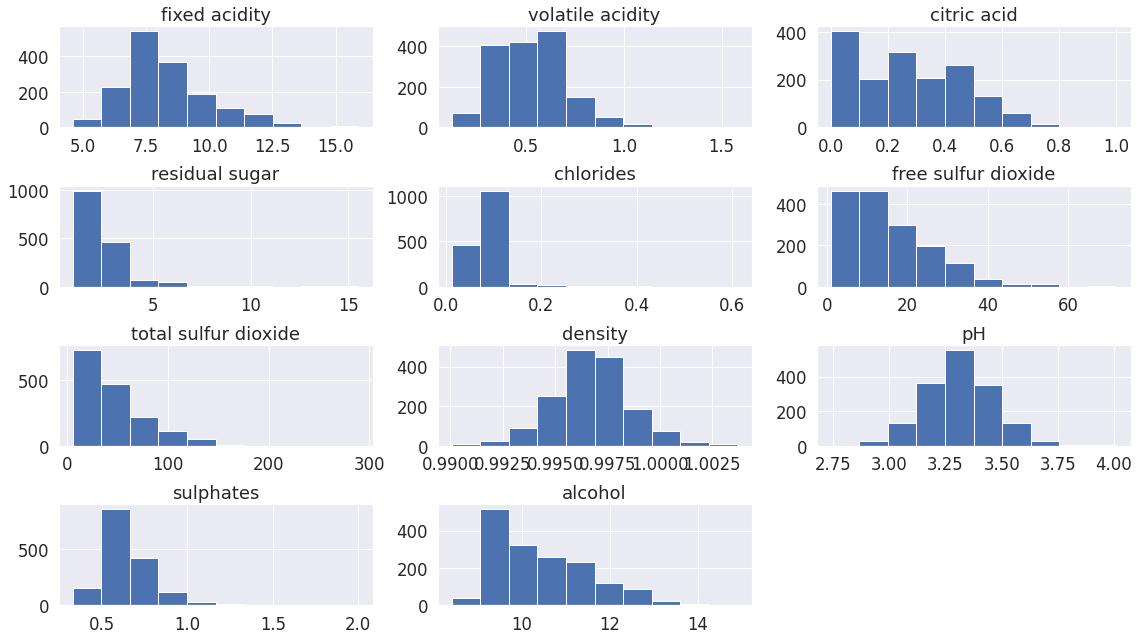

In [ ]:
### redwine_information_columns : 독립변수로 설정한 레드와인 정보 (종속변수 quality 제외)
### redwine_information_columns : 실수(float) -> 히스토그램으로 분포 확인
redwine_information_columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

### figsize() : plot()의 기본 크기 지정 
fig = plt.figure(figsize = (16, 9))
ax = fig.gca()  # Axes 생성

df[redwine_information_columns].hist(ax=ax)
plt.tight_layout()

plt.show()

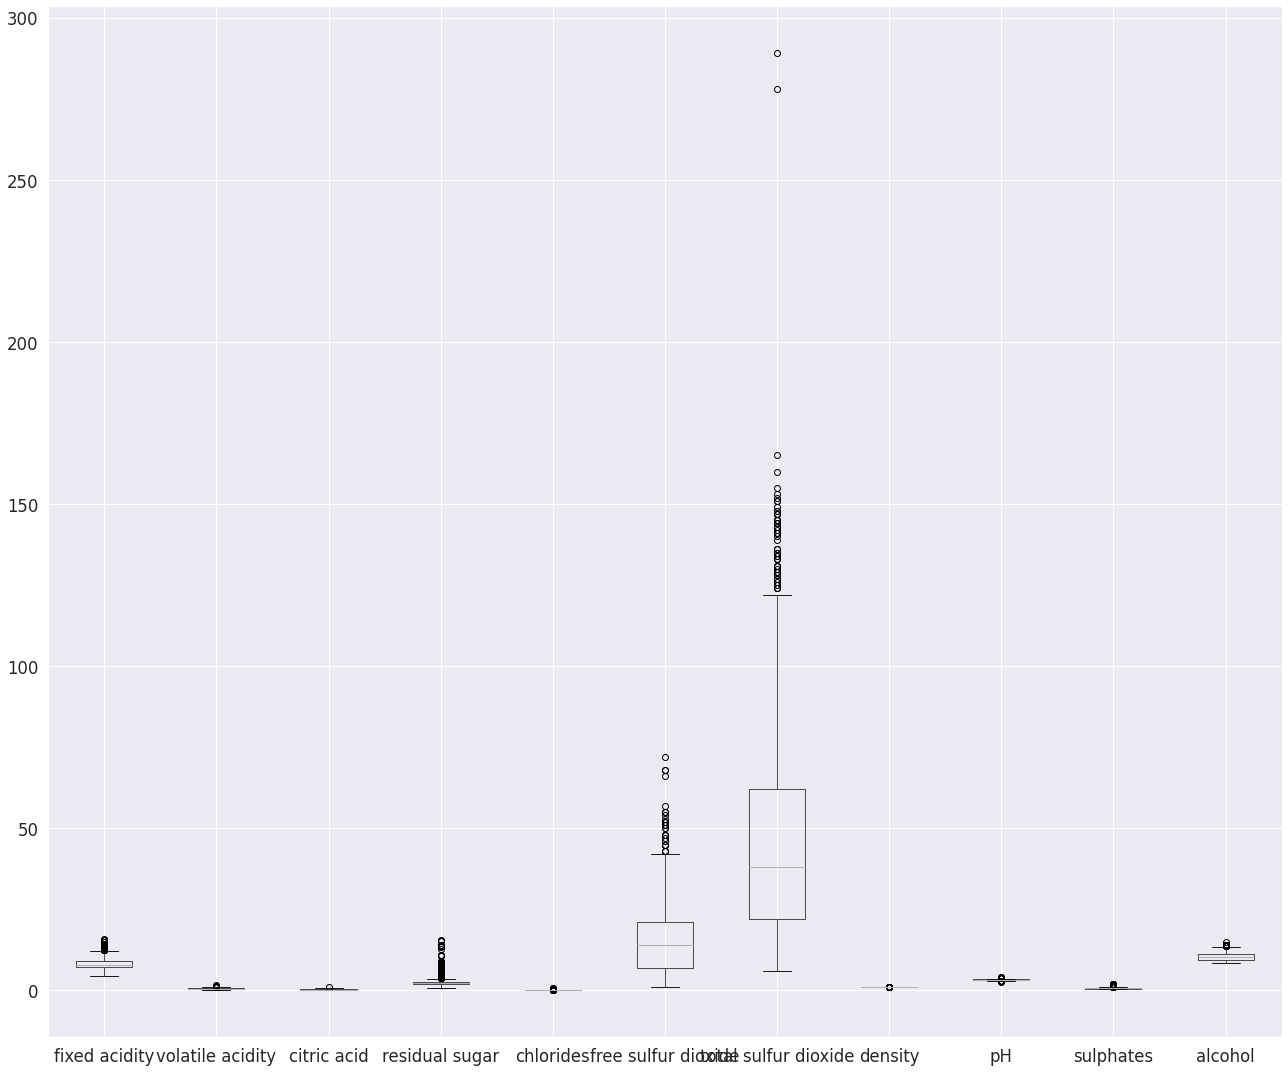

In [ ]:
### redwine_information_columns : boxplot으로 분포 확인
fig = plt.figure(figsize = (18, 15))
ax = fig.gca()  # Axes 생성

df[redwine_information_columns].boxplot(ax=ax)
plt.tight_layout()

plt.show()

In [ ]:
# 독립변수들의 분산
df[redwine_information_columns].var()

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
dtype: float64

    <해설>
    - 고정산도는 주로 7~9 사이 값을 가진다.
    - 휘발성 산도는 주로 0.3~0.7 사이 값을 가진다.
    - 구연산은 주로 0.0~0.5 사이 값을 가진다. 상대적으로 분산이 작다.
    - 잔류 설탕은 주로 1~2.5 사이 값을 가진다. 
    - 염화물은 주로 0.05~0.15 사이 값을 가진다.
    - 유리 이산화황은 주로 0~15 사이 값을 가지고, 상대적으로 분산이 크다.
    - 총 이산화황은 주로 0~60 사이 값을 가지고, 분산이 약 1082.10으로 가장 크다. 최대 250 이상에도 분포해있다(이상치)
    - 밀도는 주로 0.996~0.998 사이 값을 가진다. 값 간 차이가 거의 없어 분산이 가장 작다.
    - pH는 주로 3.1~3.5 사이 값을 가진다.
    - 황산염은 주로 0.50~0.75 사이 값을 가진다.
    - 알코올은 주로 9~10 사이 값을 가진다.

In [ ]:
# 독립변수들의 값 평균
df[redwine_information_columns].mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
dtype: float64

In [ ]:
# 이상치가 있는 독립변수가 많았으므로 독립변수들의 값 절사평균을 구해본다.
trim_mean(df[redwine_information_columns], 0.1) # 절사평균(양쪽 상/하위 10% 제외하고 평균)

array([ 8.15253708,  0.51806792,  0.26128806,  2.25835285,  0.08023497,
       14.57728337, 41.84309133,  0.99673621,  3.30909446,  0.63744731,
       10.31003123])

#### 2-4. 독립변수(x) 와 종속변수(y) 간의 관계 탐색

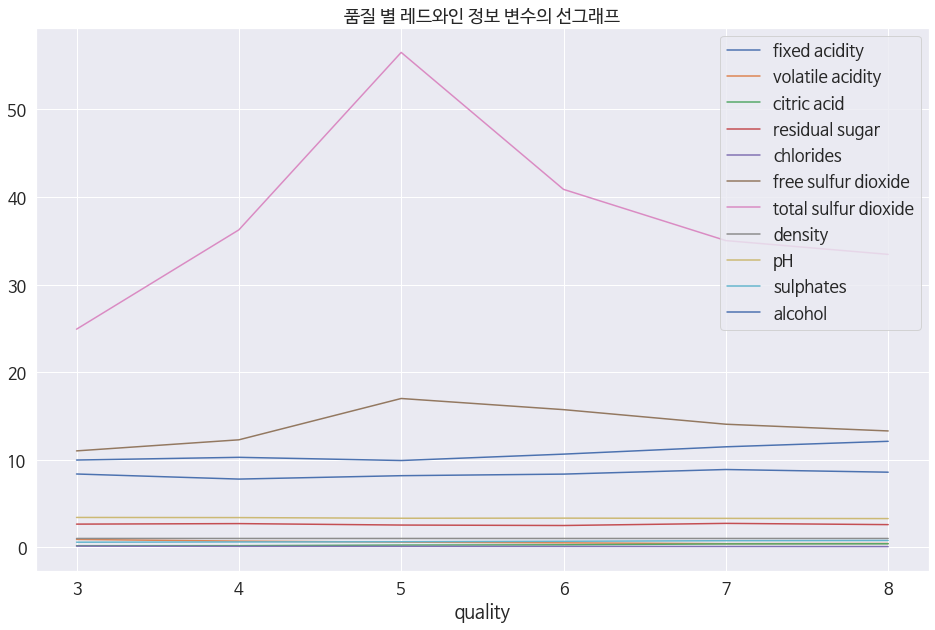

In [ ]:
### redwine_information_columns : 독립변수로 설정한 레드와인 정보 (종속변수 quality 제외)
### 'quality'별 독립변수 값의 평균 그래프(선그래프)
redwine_information_columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

### figsize() : plot()의 기본 크기 지정 
fig = plt.figure(figsize = (16, 10))
ax = fig.gca()  # Axes 생성

df.groupby('quality')[redwine_information_columns].mean().plot(ax=ax)
plt.title("품질 별 레드와인 정보 변수의 선그래프")
plt.show()

    선그래프로 확인해봤을 때, quality 별 값의 차이가 가장 큰 독립변수는 'total sulfur dioxide'이다.

##### 2-4-1. 종속변수별 독립변수의 평균과 중앙값

- 평균은 데이터에 매우 민감하기 때문에, 극단값에 민감하지 않아 Robust한 중앙값도 같이 파악해본다.

In [ ]:
# 품질 별 고정산도의 평균과 중앙값
df.groupby(['quality']).agg(['mean', 'median'])[['fixed acidity']]
# 품질에 따라 고정산도의 평균, 중앙값이 거의 (반)비례하지 않는다.

fixed acidity       
                 mean median
quality                     
3            8.360000   7.50
4            7.779245   7.50
5            8.167254   7.80
6            8.347179   7.90
7            8.872362   8.80
8            8.566667   8.25

In [ ]:
# 품질 별 휘발성 산도의 평균과 중앙값
df.groupby(['quality']).agg(['mean', 'median'])[['volatile acidity']]
# 품질이 높아질수록 휘발성 산도의 평균, 중앙값이 감소하는 편이다.

volatile acidity       
                    mean median
quality                        
3               0.884500  0.845
4               0.693962  0.670
5               0.577041  0.580
6               0.497484  0.490
7               0.403920  0.370
8               0.423333  0.370

In [ ]:
# 품질 별 구연산의 평균과 중앙값
df.groupby(['quality']).agg(['mean', 'median'])[['citric acid']]
# 품질이 높아질수록 구연산의 평균, 중앙값이 증가한다.

citric acid       
               mean median
quality                   
3          0.171000  0.035
4          0.174151  0.090
5          0.243686  0.230
6          0.273824  0.260
7          0.375176  0.400
8          0.391111  0.420

In [ ]:
# 품질 별 잔류 설탕의 평균과 중앙값
df.groupby(['quality']).agg(['mean', 'median'])[['residual sugar']]
# 품질에 따라 잔류 설탕의 평균, 중앙값이 (반)비례하지 않는다.

residual sugar       
                  mean median
quality                      
3             2.635000    2.1
4             2.694340    2.1
5             2.528855    2.2
6             2.477194    2.2
7             2.720603    2.3
8             2.577778    2.1

In [ ]:
# 품질 별 염화물의 평균과 중앙값
df.groupby(['quality']).agg(['mean', 'median'])[['chlorides']]
# 품질이 높아질수록 염화물의 평균, 중앙값이 감소하는 편이다.

chlorides        
             mean  median
quality                  
3        0.122500  0.0905
4        0.090679  0.0800
5        0.092736  0.0810
6        0.084956  0.0780
7        0.076588  0.0730
8        0.068444  0.0705

In [ ]:
# 품질 별 유리 이산화황의 평균과 중앙값
df.groupby(['quality']).agg(['mean', 'median'])[['free sulfur dioxide']]
# 품질에 따라 유리 이산화황의 평균, 중앙값이 (반)비례하지 않는다.

free sulfur dioxide       
                       mean median
quality                           
3                 11.000000    6.0
4                 12.264151   11.0
5                 16.983847   15.0
6                 15.711599   14.0
7                 14.045226   11.0
8                 13.277778    7.5

In [ ]:
# 품질 별 총 이산화황의 평균과 중앙값
df.groupby(['quality']).agg(['mean', 'median'])[['total sulfur dioxide']]
# 품질에 따라 총 이산화황의 평균, 중앙값이 (반)비례하지 않는다.

total sulfur dioxide       
                        mean median
quality                            
3                  24.900000   15.0
4                  36.245283   26.0
5                  56.513950   47.0
6                  40.869906   35.0
7                  35.020101   27.0
8                  33.444444   21.5

In [ ]:
# 품질 별 밀도의 평균과 중앙값
df.groupby(['quality']).agg(['mean', 'median'])[['density']]
# 품질에 따라 밀도의 평균, 중앙값이 거의 (반)비례하지 않는다.

density          
             mean    median
quality                    
3        0.997464  0.997565
4        0.996542  0.996500
5        0.997104  0.997000
6        0.996615  0.996560
7        0.996104  0.995770
8        0.995212  0.994940

In [ ]:
# 품질 별 pH의 평균과 중앙값
df.groupby(['quality']).agg(['mean', 'median'])[['pH']]
# 품질이 높아질수록 pH의 평균, 중앙값이 감소하는 편이다.

pH       
             mean median
quality                 
3        3.398000   3.39
4        3.381509   3.37
5        3.304949   3.30
6        3.318072   3.32
7        3.290754   3.28
8        3.267222   3.23

In [ ]:
# 품질 별 황산염의 평균과 중앙값
df.groupby(['quality']).agg(['mean', 'median'])[['sulphates']]
# 품질이 높아질수록 황산염의 평균, 중앙값이 증가하는 편이다.

sulphates       
             mean median
quality                 
3        0.570000  0.545
4        0.596415  0.560
5        0.620969  0.580
6        0.675329  0.640
7        0.741256  0.740
8        0.767778  0.740

In [ ]:
# 품질 별 알코올의 평균과 중앙값
df.groupby(['quality']).agg(['mean', 'median'])[['alcohol']]
# 품질이 높아질수록 황산염의 평균, 중앙값이 증가하는 편이다.

alcohol        
              mean  median
quality                   
3         9.955000   9.925
4        10.265094  10.000
5         9.899706   9.700
6        10.629519  10.500
7        11.465913  11.500
8        12.094444  12.150

    <해설>
    - 품질이 높아질수록 구연산, 황산염, 알코올의 평균, 중앙값이 높아지는 경향이 있다.
    - 품질이 높아질수록 휘발성 산도, 염화물, pH의 평균, 중앙값이 낮아지는 경향이 있다.
    - 품질에 따라 고정산도, 잔류 설탕, 유리 이산화황, 총 이산화황, 밀도의 평균, 중앙값이 거의 (반)비례하지 않는 경향이 있다.

##### 2-4-2. 독립변수와 종속변수 간 상관관계 분석
  - pearson 계수로 정확한 상관관계 분석
  - 종속변수와 상관관계가 있는 독립변수를 산점도로 시각화

In [ ]:
# 첫 5행 탐색
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# 독립변수와 종속변수 간 상관관계 분석(pearson 상관계수)
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

corr = df[cols].corr(method = 'pearson')
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


    - Person 상관계수 : 상관관계 분석시 사용하는 지표
    - -1 에서 1 사이의 값을 가진다
    - 1일 때는 완전 양의 상관(perfect positive correlation), -1일 때는 완전 음의 상관관계(perfect negative correlation)관계를 보임

    - 절댓값이 0.2 미만 : 상관관계 없음
    - 0.2 ~ 0.4 : 약한 상관관계
    - 0.4 ~ 0.7 : 다소 높은 상관관계
    - 0.7 ~ 0.9 : 높은 상관관계
    - 0.9 이상 : 매우 높은 상관관계

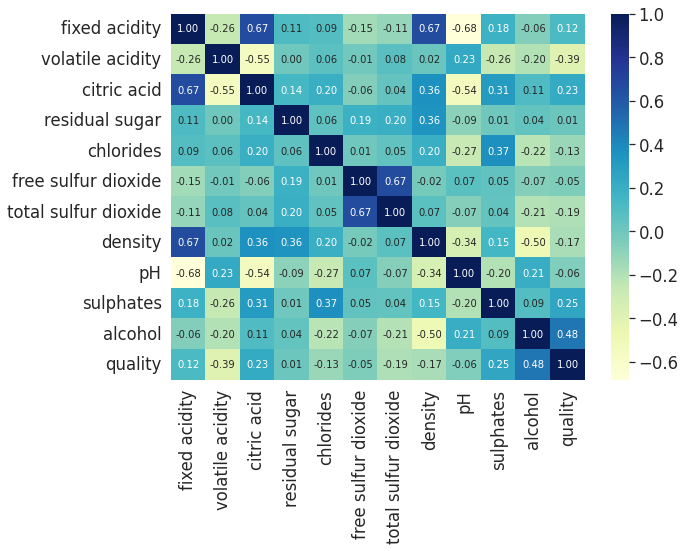

In [ ]:
# 상관관계 Heatmap으로 시각화 (seaborn, n.d.)

fig = plt.figure(figsize = (10, 8))
ax = fig.gca()

sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정 
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':10},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "YlGnBu")
plt.tight_layout()
plt.show()

    <해설> 
    "quality - 품질"과 다른 변수간의 상관관계를 살펴보면,
    
    "quality - 품질"은
    "alcohol - 알코올"과 <<다소 높은 양의 상관관계(0.48)>>를 보이고,
    "volatile acidity - 휘발성 산도"와 <<약한 음의 상관관계(-0.39)>>를 보이고,
    "citric acid - 구연산"과 <<약한 양의 상관관계(0.23)>>를 보이고,
    "sulphates - 황산염"과 <<약한 양의 상관관계(0.25)>>를 보인다.

    나머지 변수들은 품질과 상관관계가 없다.

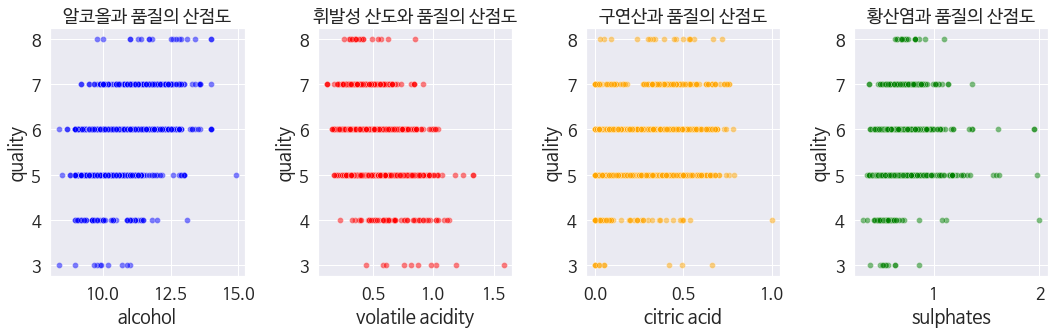

In [ ]:
# 종속변수와 상관관계가 있는 독립변수들 간의 관계를 산점도로 시각화

plt.figure(figsize=(15, 5))
plt.subplot(141) #행1 열4 1번째 position
sns.scatterplot(data=df, x='alcohol', y='quality', markers='o', color='blue', alpha=0.5)
plt.title('알코올과 품질의 산점도')

plt.subplot(142)
sns.scatterplot(data=df, x='volatile acidity', y='quality', markers='o', color='red', alpha=0.5)
plt.title('휘발성 산도와 품질의 산점도')

plt.subplot(143)
sns.scatterplot(data=df, x='citric acid', y='quality', markers='o', color='orange', alpha=0.5)
plt.title('구연산과 품질의 산점도')

plt.subplot(144)
sns.scatterplot(data=df, x='sulphates', y='quality', markers='o', color='green', alpha=0.5)
plt.title('황산염과 품질의 산점도')

plt.tight_layout()
plt.show()

###### 2-4-2.1 alcohol(알코올) - quality(품질)의 관계

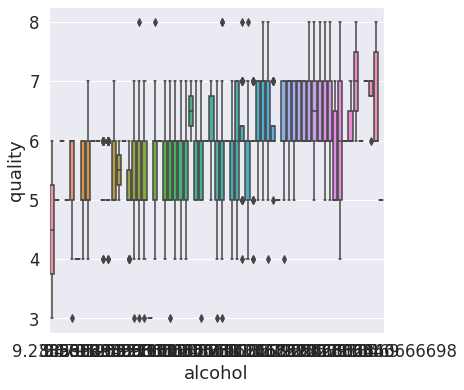

In [ ]:
## 알코올 별 품질 특징 (boxplot: 상자그림 이용)
fig = plt.figure(figsize = (6, 6))
sns.boxplot(x='alcohol', y='quality', data=df)

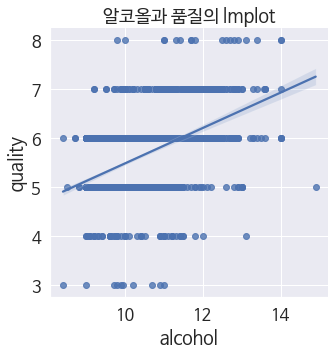

In [ ]:
# lmplot을 통해 상관관계 파악
sns.lmplot(x='alcohol', y='quality', data=df)
plt.title('알코올과 품질의 lmplot')
plt.show()
# 그림자 : 데이터가 흩어진 정도

    <해설>
    - 품질과 알코올이 양의 상관관계를 갖고 있다.
    - 즉, 알코올이 높은 와인이 상대적으로 더 높은 품질을 보이는 경향이 있다.

###### 2-4-2.2 volatile acidity (휘발성 산도) - quality(품질)의 관계

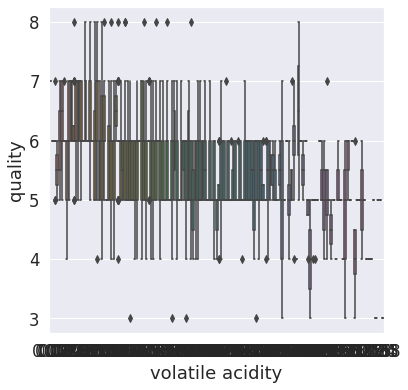

In [ ]:
## 휘발성 산도 별 품질 특징 (boxplot 이용)
fig = plt.figure(figsize = (6, 6))
sns.boxplot(x='volatile acidity', y='quality', data=df)

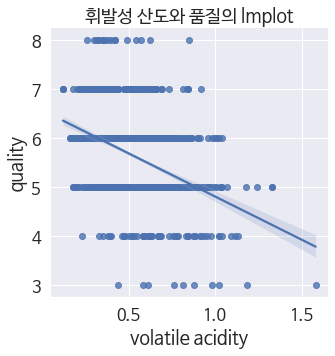

In [ ]:
# lmplot을 통해 상관관계 파악
sns.lmplot(x='volatile acidity', y='quality', data=df)
plt.title('휘발성 산도와 품질의 lmplot')
plt.show()
# 그림자 : 데이터가 흩어진 정도

    <해설>
    - 품질과 휘발성 산도가 음의 상관관계를 갖고 있다.
    - 즉, 휘발성 산도가 낮은 와인이 상대적으로 더 높은 품질을 보인다.

###### 2-4-2.3 citric acid (구연산) - quality(품질)의 관계

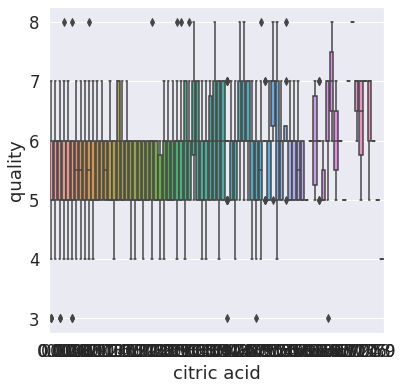

In [ ]:
## 구연산 별 품질 특징 (boxplot 이용)
fig = plt.figure(figsize = (6, 6))
sns.boxplot(x='citric acid', y='quality', data=df)

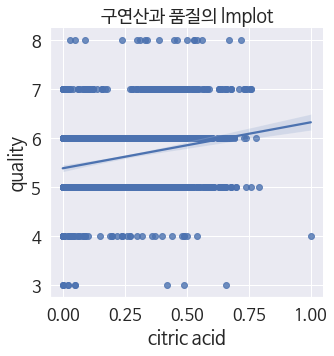

In [ ]:
# lmplot을 통해 상관관계 파악
sns.lmplot(x='citric acid', y='quality', data=df)
plt.title('구연산과 품질의 lmplot')
plt.show()
# 그림자 : 데이터가 흩어진 정도

    <해설>
    - 품질과 구연산이 양의 상관관계를 갖고 있다.
    - 즉, 구연산이 높은 와인이 상대적으로 더 높은 품질을 보이는 경향이 있다.

###### 2-4-2.4 sulphates(황산염) - quality(품질)의 관계

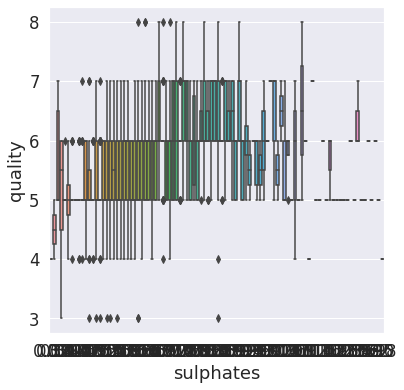

In [ ]:
## 황산염 별 품질 특징 (boxplot 이용)
fig = plt.figure(figsize = (6, 6))
sns.boxplot(x='sulphates', y='quality', data=df)

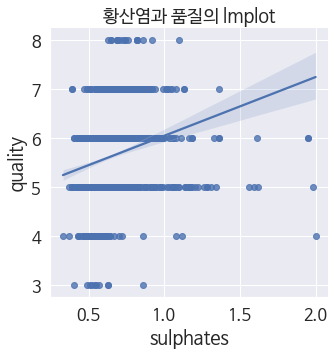

In [ ]:
# lmplot을 통해 상관관계 파악
sns.lmplot(x='sulphates', y='quality', data=df)
plt.title('황산염과 품질의 lmplot')
plt.show()
# 그림자 : 데이터가 흩어진 정도

    <해설>
    - 품질과 황산염이 양의 상관관계를 갖고 있다.
    - 즉, 황산염이 높은 와인이 상대적으로 더 높은 품질을 보이는 경향이 있다.

##### 2-4-3. 모집단의 신뢰구간 구하기

종속변수(quality)와 상관관계가 있는 변수의 신뢰구간을 구한다. (모집단)

: alcohol, volatile acidity, citric acid, sulphates

In [ ]:
# quality(종속변수) 별 독립변수 값의 평균 파악하기
df_mean=df.groupby('quality').mean() 
df_mean

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [ ]:
# df 안의 값 별 로 찾기
quality3=df[df['quality']==3]
quality4=df[df['quality']==4]
quality5=df[df['quality']==5]
quality6=df[df['quality']==6]
quality7=df[df['quality']==7]
quality8=df[df['quality']==8]

In [ ]:
# quality 별 독립변수 값에 대한 95% 신뢰구간 함수 생성
def plot_hist(x, p=5):
  plt.hist(x, alpha=0.5)
  plt.axvline(x.mean()) # vertical line으로 그려라
  # 95% 신뢰구간
  plt.axvline(np.percentile(x, p/2), color='red', linewidth=3) # 2.5
  plt.axvline(np.percentile(x, 100-p/2), color='red', linewidth=3) # 97.5

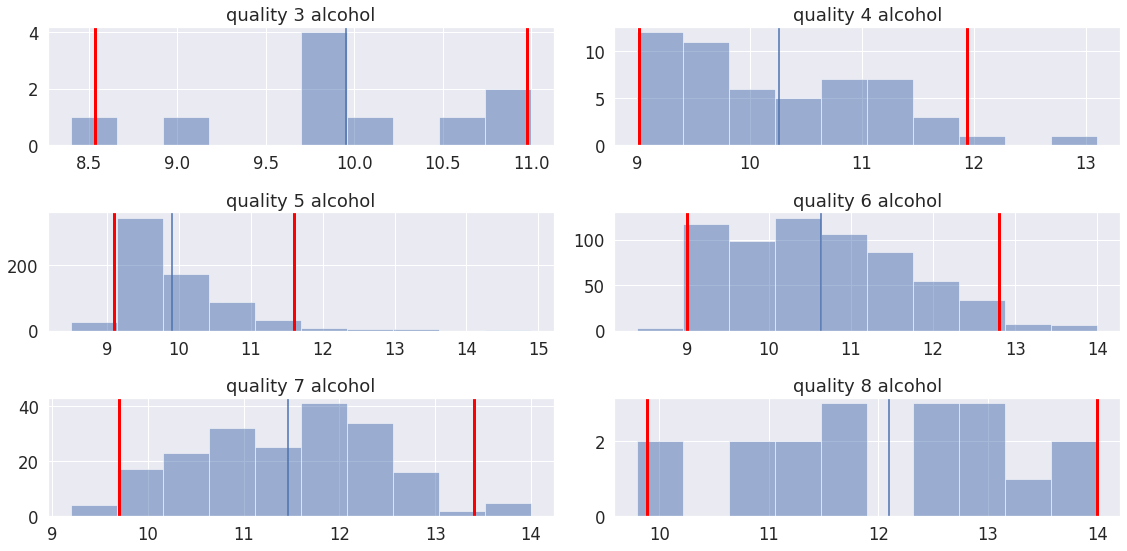

In [ ]:
# quality 별 alcohol의 95% 신뢰구간 구하기
# 파란색 선 : mean, 빨간색 선 : 신뢰구간 경계선

fig = plt.figure(figsize = (16, 8))

a=quality3['alcohol']
b=quality4['alcohol']
c=quality5['alcohol']
d=quality6['alcohol']
e=quality7['alcohol']
f=quality8['alcohol']

plt.subplot(3, 2, 1) # 행 3개, 열 2개, 1번째 positon
plot_hist(a)
plt.title('quality 3 alcohol')

plt.subplot(3, 2, 2)
plot_hist(b)
plt.title('quality 4 alcohol')

plt.subplot(3, 2, 3)
plot_hist(c)
plt.title('quality 5 alcohol')

plt.subplot(3, 2, 4)
plot_hist(d)
plt.title('quality 6 alcohol')

plt.subplot(3, 2, 5)
plot_hist(e)
plt.title('quality 7 alcohol')

plt.subplot(3, 2, 6)
plot_hist(f)
plt.title('quality 8 alcohol')

plt.tight_layout()
plt.show()

    <해설>
    모집단에서 quality가 높아질수록 alcohol의 평균이 대체적으로 높아지는 경향이 있다. (:quality 5 예외)
    하지만, quality 3 ~ quality 8의 신뢰구간이 겹치는 구간이 있으므로 alcohol이 높을수록 quality가 높아진다는 결론을 단정지을 수 없다.

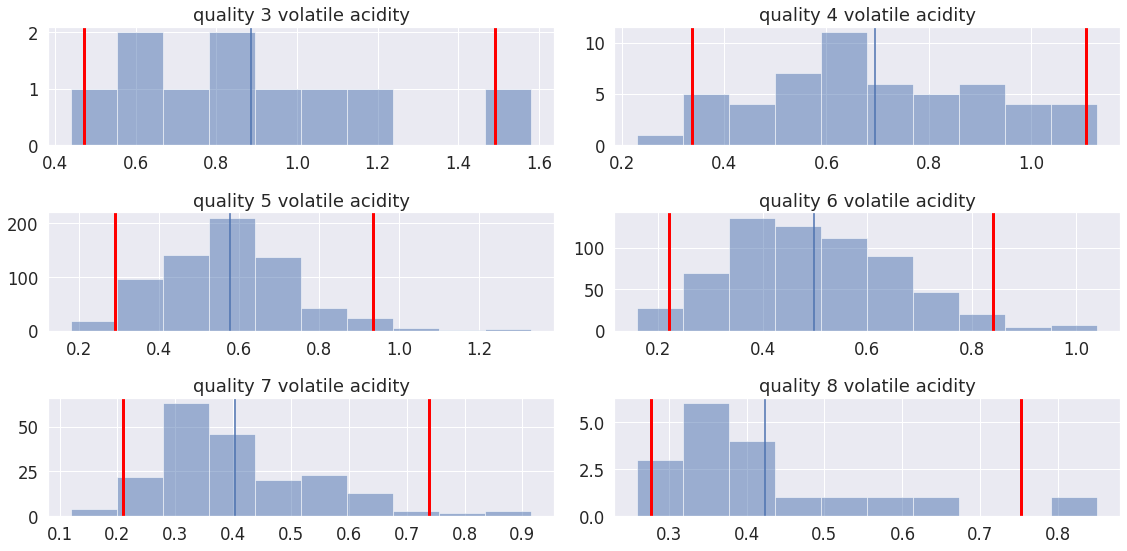

In [ ]:
# quality 별 volatile acidity의 95% 신뢰구간 구하기
# 파란색 선 : mean, 빨간색 선 : 신뢰구간 경계선

fig = plt.figure(figsize = (16, 8))

a=quality3['volatile acidity']
b=quality4['volatile acidity']
c=quality5['volatile acidity']
d=quality6['volatile acidity']
e=quality7['volatile acidity']
f=quality8['volatile acidity']

plt.subplot(3, 2, 1) # 행 3개, 열 2개, 1번째 positon
plot_hist(a)
plt.title('quality 3 volatile acidity')

plt.subplot(3, 2, 2)
plot_hist(b)
plt.title('quality 4 volatile acidity')

plt.subplot(3, 2, 3)
plot_hist(c)
plt.title('quality 5 volatile acidity')

plt.subplot(3, 2, 4)
plot_hist(d)
plt.title('quality 6 volatile acidity')

plt.subplot(3, 2, 5)
plot_hist(e)
plt.title('quality 7 volatile acidity')

plt.subplot(3, 2, 6)
plot_hist(f)
plt.title('quality 8 volatile acidity')

plt.tight_layout()
plt.show()

    <해설>
    모집단에서 quality가 높아질수록 volatile acidity의 평균이 대체적으로 낮아지는 경향이 있다. (: qulaity 8 예외)
    하지만, quality 3 ~ quality 8의 신뢰구간이 겹치는 구간이 있으므로 volatile acidity가 높을수록 quality가 낮아진다는 결론을 단정지을 수 없다.

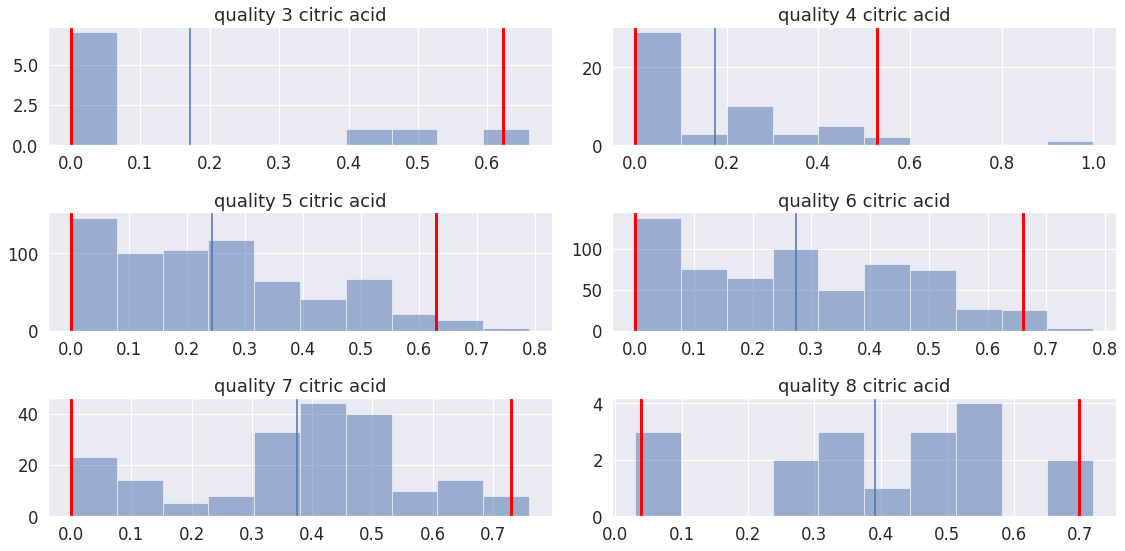

In [ ]:
# quality 별 citric acid의 95% 신뢰구간 구하기
# 파란색 선 : mean, 빨간색 선 : 신뢰구간 경계선

fig = plt.figure(figsize = (16, 8))

a=quality3['citric acid']
b=quality4['citric acid']
c=quality5['citric acid']
d=quality6['citric acid']
e=quality7['citric acid']
f=quality8['citric acid']

plt.subplot(3, 2, 1) # 행 3개, 열 2개, 1번째 positon
plot_hist(a)
plt.title('quality 3 citric acid')

plt.subplot(3, 2, 2)
plot_hist(b)
plt.title('quality 4 citric acid')

plt.subplot(3, 2, 3)
plot_hist(c)
plt.title('quality 5 citric acid')

plt.subplot(3, 2, 4)
plot_hist(d)
plt.title('quality 6 citric acid')

plt.subplot(3, 2, 5)
plot_hist(e)
plt.title('quality 7 citric acid')

plt.subplot(3, 2, 6)
plot_hist(f)
plt.title('quality 8 citric acid')

plt.tight_layout()
plt.show()

    <해설>
    모집단에서 quality가 높아질수록 citric acid의 평균이 높아진다.
    하지만, quality 3 ~ quality 8의 신뢰구간이 겹치는 구간이 있으므로 citric acid가 높을수록 quality가 높아진다는 결론을 단정지을 수 없다.

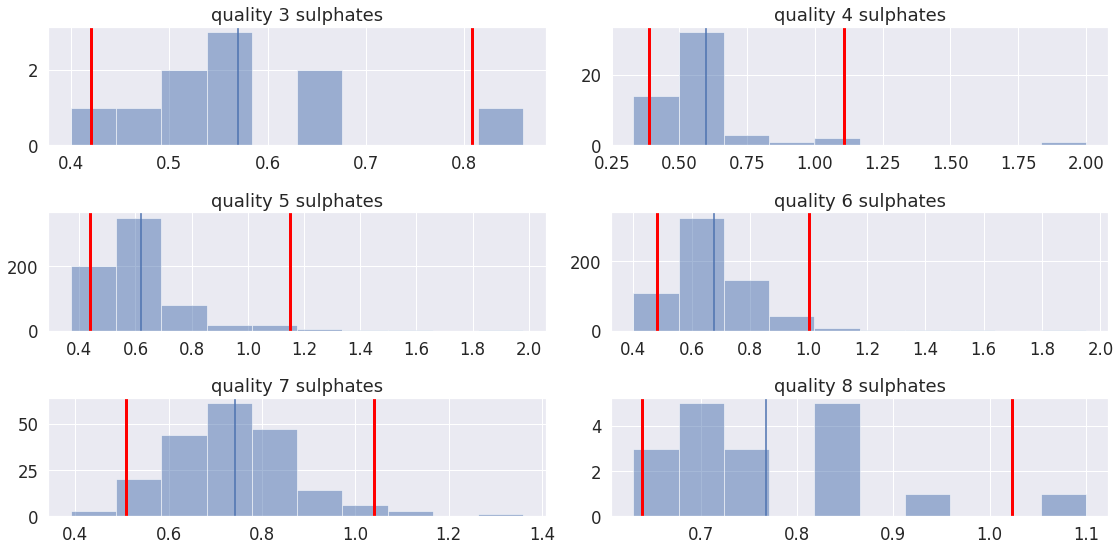

In [ ]:
# quality 별 sulphates의 95% 신뢰구간 구하기
# 파란색 선 : mean, 빨간색 선 : 신뢰구간 경계선

fig = plt.figure(figsize = (16, 8))

a=quality3['sulphates']
b=quality4['sulphates']
c=quality5['sulphates']
d=quality6['sulphates']
e=quality7['sulphates']
f=quality8['sulphates']

plt.subplot(3, 2, 1) # 행 3개, 열 2개, 1번째 positon
plot_hist(a)
plt.title('quality 3 sulphates')

plt.subplot(3, 2, 2)
plot_hist(b)
plt.title('quality 4 sulphates')

plt.subplot(3, 2, 3)
plot_hist(c)
plt.title('quality 5 sulphates')

plt.subplot(3, 2, 4)
plot_hist(d)
plt.title('quality 6 sulphates')

plt.subplot(3, 2, 5)
plot_hist(e)
plt.title('quality 7 sulphates')

plt.subplot(3, 2, 6)
plot_hist(f)
plt.title('quality 8 sulphates')

plt.tight_layout()
plt.show()

    <해설>
    모집단에서 quality가 높아질수록 sulphates의 평균이 높아진다.
    하지만, quality 3 ~ quality 8의 신뢰구간이 겹치는 구간이 있으므로 sulphates가 높을수록 quality가 높아진다는 결론을 단정지을 수 없다.

##### 2-4-4. 부트스트랩

- 모집단의 신뢰구간에서 alcohol, volatile acidity, citric acid, sulphates과 quality 간의 비례/반비례 관계를 단정지을 수 없으므로, 부트스트랩 리샘플링을 통해 다시 관계를 파악한다.

###### alcohol

In [ ]:
# qulaity3~8 -> alcohol : 모집단을 1000번 뽑아서(샘플링해서) 이들에 대한 mean(평균)을 냄.
iterations=1000
quality3_list=[]
quality4_list=[]
quality5_list=[]
quality6_list=[]
quality7_list=[]
quality8_list=[]

for _ in range(iterations):
  quality3_bootstrap_means=quality3.sample(frac=1, replace=True).alcohol.mean()
  quality3_list.append(quality3_bootstrap_means)

for _ in range(iterations):
  quality4_bootstrap_means=quality4.sample(frac=1, replace=True).alcohol.mean()
  quality4_list.append(quality4_bootstrap_means)

for _ in range(iterations):
  quality5_bootstrap_means=quality5.sample(frac=1, replace=True).alcohol.mean()
  quality5_list.append(quality5_bootstrap_means)

for _ in range(iterations):
  quality6_bootstrap_means=quality6.sample(frac=1, replace=True).alcohol.mean()
  quality6_list.append(quality6_bootstrap_means)

for _ in range(iterations):
  quality7_bootstrap_means=quality7.sample(frac=1, replace=True).alcohol.mean()
  quality7_list.append(quality7_bootstrap_means)

for _ in range(iterations):
  quality8_bootstrap_means=quality8.sample(frac=1, replace=True).alcohol.mean()
  quality8_list.append(quality8_bootstrap_means)

In [ ]:
# series로 type 변환 -> index가 같이 나옴
quality3_series=pd.Series(quality3_list)
quality4_series=pd.Series(quality4_list)
quality5_series=pd.Series(quality5_list)
quality6_series=pd.Series(quality6_list)
quality7_series=pd.Series(quality7_list)
quality8_series=pd.Series(quality8_list)

In [ ]:
# dist plot 함수 생성
def plot_dists(a, b, c, d, e, f, nbins, p=5):
  combined=pd.concat([a, b, c, d, e, f])
  breaks=np.linspace(combined.min(), combined.max(), num=nbins+1)

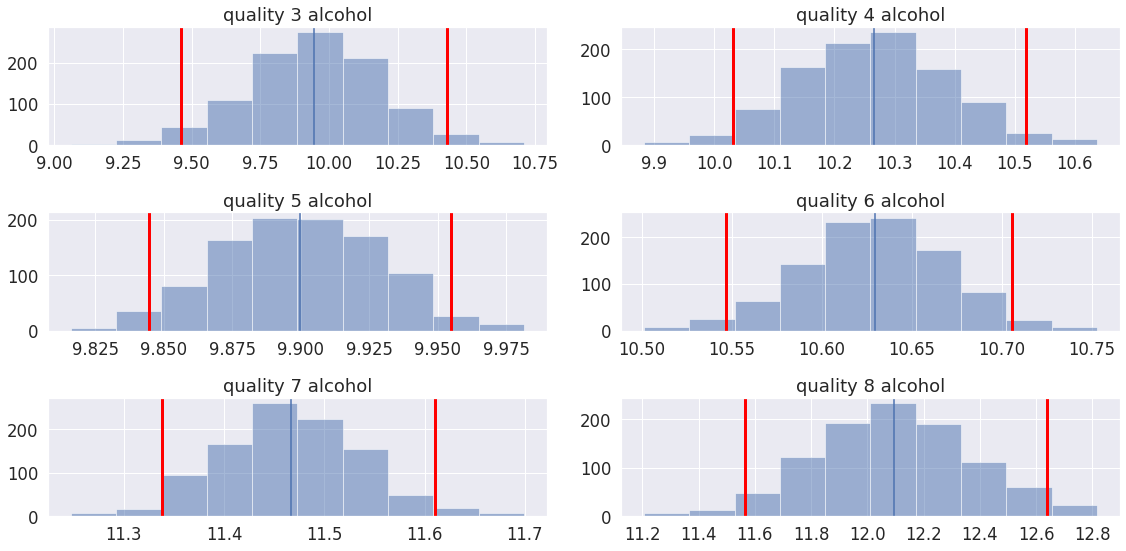

In [ ]:
# 다시 뽑은 1000개의 '평균들에 대한 평균'의 95% 신뢰구간
# 파란색 선 : mean, 빨간색 선 : 신뢰구간 경계선

fig = plt.figure(figsize = (16, 8))

a = quality3_series
b = quality4_series
c = quality5_series
d = quality6_series
e = quality7_series
f = quality8_series

plt.subplot(3, 2, 1) # 행 3개, 열 2개, 1번째 positon
plot_hist(a)
plt.title('quality 3 alcohol')

plt.subplot(3, 2, 2)
plot_hist(b)
plt.title('quality 4 alcohol')

plt.subplot(3, 2, 3)
plot_hist(c)
plt.title('quality 5 alcohol')

plt.subplot(3, 2, 4)
plot_hist(d)
plt.title('quality 6 alcohol')

plt.subplot(3, 2, 5)
plot_hist(e)
plt.title('quality 7 alcohol')

plt.subplot(3, 2, 6)
plot_hist(f)
plt.title('quality 8 alcohol')

plt.tight_layout()
plt.show()
plot_dists(a, b, c, d, e, f, nbins=80)
plt.show()

In [ ]:
# 부트스트랩 평균 (파란색 선)
quality3_series.mean(), quality4_series.mean(), quality5_series.mean(), quality6_series.mean(), quality7_series.mean(), quality8_series.mean()

(9.944970000000005,
 10.265787735849061,
 9.899624449339196,
 10.629580851619645,
 11.466594974874386,
 12.09655)

In [ ]:
 # 신뢰구간
print(f'quality3 :{[np.percentile(quality3_series, 2.5), np.percentile(quality3_series, 97.5)]}')
print(f'quality4 :{[np.percentile(quality4_series, 2.5), np.percentile(quality4_series, 97.5)]}')
print(f'quality5 :{[np.percentile(quality5_series, 2.5), np.percentile(quality5_series, 97.5)]}')
print(f'quality6 :{[np.percentile(quality6_series, 2.5), np.percentile(quality6_series, 97.5)]}')
print(f'quality7 :{[np.percentile(quality7_series, 2.5), np.percentile(quality7_series, 97.5)]}')
print(f'quality8 :{[np.percentile(quality8_series, 2.5), np.percentile(quality8_series, 97.5)]}')

quality3 :[9.46, 10.430000000000001]
quality4 :[10.032051886792454, 10.517924528301883]
quality5 :[9.844704478707769, 9.954928414096903]
quality6 :[10.546588296760708, 10.705677899686503]
quality7 :[11.338266331658295, 11.610050251256277]
quality8 :[11.566666666666668, 12.638888888888891]


    <해설>
    부트스트랩 결과, quality5~6, quality6~7에서 신뢰구간이 겹치지 않는다.
    따라서 이 구간에서는 quality 별 alcohol이 상이하다는 결론이 도출된다.
    또한 이 구간에서 quality가 높아질수록 부트스트랩 평균이 높아진다.
    결론적으로, quality5 ~ quality7에서 quality가 높아질수록 alcohol이 점점 높아진다.

###### volatile acidity

In [ ]:
# qulaity3~8 -> volatile acidity : 모집단을 1000번 뽑아서(샘플링해서) 이들에 대한 mean(평균)을 냄.
iterations=1000
quality3_list=[]
quality4_list=[]
quality5_list=[]
quality6_list=[]
quality7_list=[]
quality8_list=[]

for _ in range(iterations):
  quality3_bootstrap_means=quality3.sample(frac=1, replace=True)['volatile acidity'].mean()
  quality3_list.append(quality3_bootstrap_means)

for _ in range(iterations):
  quality4_bootstrap_means=quality4.sample(frac=1, replace=True)['volatile acidity'].mean()
  quality4_list.append(quality4_bootstrap_means)

for _ in range(iterations):
  quality5_bootstrap_means=quality5.sample(frac=1, replace=True)['volatile acidity'].mean()
  quality5_list.append(quality5_bootstrap_means)

for _ in range(iterations):
  quality6_bootstrap_means=quality6.sample(frac=1, replace=True)['volatile acidity'].mean()
  quality6_list.append(quality6_bootstrap_means)

for _ in range(iterations):
  quality7_bootstrap_means=quality7.sample(frac=1, replace=True)['volatile acidity'].mean()
  quality7_list.append(quality7_bootstrap_means)

for _ in range(iterations):
  quality8_bootstrap_means=quality8.sample(frac=1, replace=True)['volatile acidity'].mean()
  quality8_list.append(quality8_bootstrap_means)

In [ ]:
# series로 type 변환 -> index가 같이 나옴
quality3_series=pd.Series(quality3_list)
quality4_series=pd.Series(quality4_list)
quality5_series=pd.Series(quality5_list)
quality6_series=pd.Series(quality6_list)
quality7_series=pd.Series(quality7_list)
quality8_series=pd.Series(quality8_list)

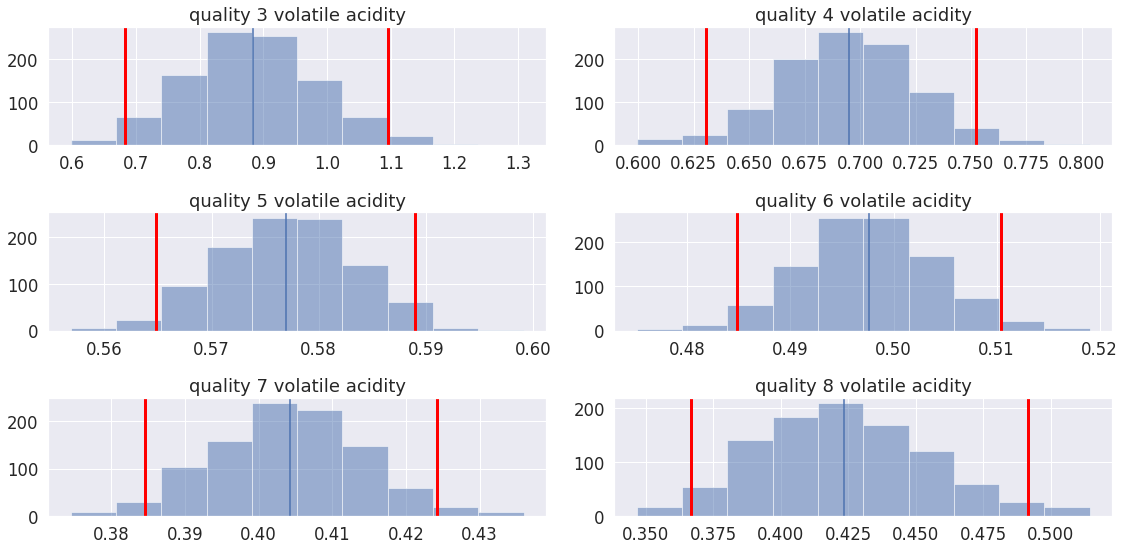

In [ ]:
# 다시 뽑은 1000개의 '평균들에 대한 평균'의 95% 신뢰구간
# 파란색 선 : mean, 빨간색 선 : 신뢰구간 경계선

fig = plt.figure(figsize = (16, 8))

a = quality3_series
b = quality4_series
c = quality5_series
d = quality6_series
e = quality7_series
f = quality8_series

plt.subplot(3, 2, 1) # 행 3개, 열 2개, 1번째 positon
plot_hist(a)
plt.title('quality 3 volatile acidity')

plt.subplot(3, 2, 2)
plot_hist(b)
plt.title('quality 4 volatile acidity')

plt.subplot(3, 2, 3)
plot_hist(c)
plt.title('quality 5 volatile acidity')

plt.subplot(3, 2, 4)
plot_hist(d)
plt.title('quality 6 volatile acidity')

plt.subplot(3, 2, 5)
plot_hist(e)
plt.title('quality 7 volatile acidity')

plt.subplot(3, 2, 6)
plot_hist(f)
plt.title('quality 8 volatile acidity')

plt.tight_layout()
plt.show()
plot_dists(a, b, c, d, e, f, nbins=80)
plt.show()

In [ ]:
# 부트스트랩 평균 (파란색 선)
quality3_series.mean(), quality4_series.mean(), quality5_series.mean(), quality6_series.mean(), quality7_series.mean(), quality8_series.mean()

(0.8839774999999989,
 0.6949406603773579,
 0.5769343024963279,
 0.4976198981191223,
 0.4042695226130649,
 0.42349944444444465)

In [ ]:
 # 신뢰구간
print(f'quality3 :{[np.percentile(quality3_series, 2.5), np.percentile(quality3_series, 97.5)]}')
print(f'quality4 :{[np.percentile(quality4_series, 2.5), np.percentile(quality4_series, 97.5)]}')
print(f'quality5 :{[np.percentile(quality5_series, 2.5), np.percentile(quality5_series, 97.5)]}')
print(f'quality6 :{[np.percentile(quality6_series, 2.5), np.percentile(quality6_series, 97.5)]}')
print(f'quality7 :{[np.percentile(quality7_series, 2.5), np.percentile(quality7_series, 97.5)]}')
print(f'quality8 :{[np.percentile(quality8_series, 2.5), np.percentile(quality8_series, 97.5)]}')

quality3 :[0.6829625, 1.0960625000000002]
quality4 :[0.6306108490566035, 0.7521061320754717]
quality5 :[0.5648140602055804, 0.5889509911894268]
quality6 :[0.48482680250783666, 0.510469827586207]
quality7 :[0.38454522613065345, 0.42427575376884424]
quality8 :[0.36665277777777766, 0.49166666666666653]


    <해설>
    부트스트랩 결과, quality3~4, quality4~5, quality5~6, quality 6~7, quality7~8에서 모두 신뢰구간이 겹친다.
    따라서 이 구간에서는 quality 별 volatile acidity가 상이하지 않다는 결론이 도출된다.
    또한 이 구간에서 quality가 높아질수록 부트스트랩 평균이 낮아지는 경향이 있다 (: quality8 예외)
    결론적으로, quality3 ~ quality8에서 quality가 높아질수록 volatile acidity가 점점 낮아진다고 볼 수 없다.

###### citric acid

In [ ]:
# qulaity3~8 -> citric acid : 모집단을 1000번 뽑아서(샘플링해서) 이들에 대한 mean(평균)을 냄.
iterations=1000
quality3_list=[]
quality4_list=[]
quality5_list=[]
quality6_list=[]
quality7_list=[]
quality8_list=[]

for _ in range(iterations):
  quality3_bootstrap_means=quality3.sample(frac=1, replace=True)['citric acid'].mean()
  quality3_list.append(quality3_bootstrap_means)

for _ in range(iterations):
  quality4_bootstrap_means=quality4.sample(frac=1, replace=True)['citric acid'].mean()
  quality4_list.append(quality4_bootstrap_means)

for _ in range(iterations):
  quality5_bootstrap_means=quality5.sample(frac=1, replace=True)['citric acid'].mean()
  quality5_list.append(quality5_bootstrap_means)

for _ in range(iterations):
  quality6_bootstrap_means=quality6.sample(frac=1, replace=True)['citric acid'].mean()
  quality6_list.append(quality6_bootstrap_means)

for _ in range(iterations):
  quality7_bootstrap_means=quality7.sample(frac=1, replace=True)['citric acid'].mean()
  quality7_list.append(quality7_bootstrap_means)

for _ in range(iterations):
  quality8_bootstrap_means=quality8.sample(frac=1, replace=True)['citric acid'].mean()
  quality8_list.append(quality8_bootstrap_means)

In [ ]:
# series로 type 변환 -> index가 같이 나옴
quality3_series=pd.Series(quality3_list)
quality4_series=pd.Series(quality4_list)
quality5_series=pd.Series(quality5_list)
quality6_series=pd.Series(quality6_list)
quality7_series=pd.Series(quality7_list)
quality8_series=pd.Series(quality8_list)

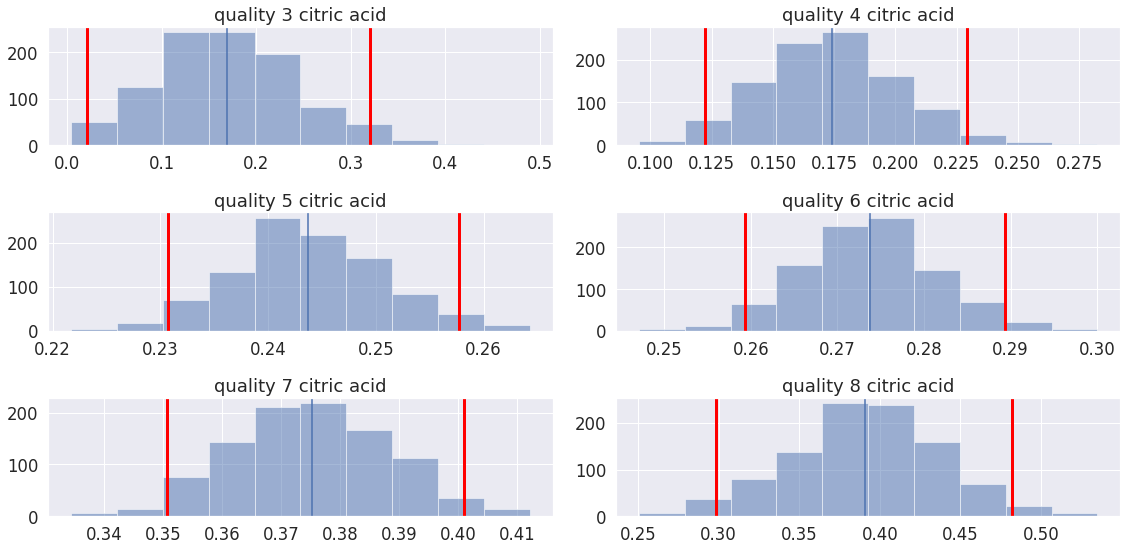

In [ ]:
# 다시 뽑은 1000개의 '평균들에 대한 평균'의 95% 신뢰구간
# 파란색 선 : mean, 빨간색 선 : 신뢰구간 경계선

fig = plt.figure(figsize = (16, 8))

a = quality3_series
b = quality4_series
c = quality5_series
d = quality6_series
e = quality7_series
f = quality8_series

plt.subplot(3, 2, 1) # 행 3개, 열 2개, 1번째 positon
plot_hist(a)
plt.title('quality 3 citric acid')

plt.subplot(3, 2, 2)
plot_hist(b)
plt.title('quality 4 citric acid')

plt.subplot(3, 2, 3)
plot_hist(c)
plt.title('quality 5 citric acid')

plt.subplot(3, 2, 4)
plot_hist(d)
plt.title('quality 6 citric acid')

plt.subplot(3, 2, 5)
plot_hist(e)
plt.title('quality 7 citric acid')

plt.subplot(3, 2, 6)
plot_hist(f)
plt.title('quality 8 citric acid')

plt.tight_layout()
plt.show()
plot_dists(a, b, c, d, e, f, nbins=80)
plt.show()

In [ ]:
# 부트스트랩 평균 (파란색 선)
quality3_series.mean(), quality4_series.mean(), quality5_series.mean(), quality6_series.mean(), quality7_series.mean(), quality8_series.mean()

(0.16854099999999997,
 0.17416283018867917,
 0.24374183553597636,
 0.27382241379310346,
 0.3751641708542714,
 0.39092888888888916)

In [ ]:
 # 신뢰구간
print(f'quality3 :{[np.percentile(quality3_series, 2.5), np.percentile(quality3_series, 97.5)]}')
print(f'quality4 :{[np.percentile(quality4_series, 2.5), np.percentile(quality4_series, 97.5)]}')
print(f'quality5 :{[np.percentile(quality5_series, 2.5), np.percentile(quality5_series, 97.5)]}')
print(f'quality6 :{[np.percentile(quality6_series, 2.5), np.percentile(quality6_series, 97.5)]}')
print(f'quality7 :{[np.percentile(quality7_series, 2.5), np.percentile(quality7_series, 97.5)]}')
print(f'quality8 :{[np.percentile(quality8_series, 2.5), np.percentile(quality8_series, 97.5)]}')

quality3 :[0.02095, 0.32002499999999995]
quality4 :[0.12243396226415094, 0.22924999999999998]
quality5 :[0.23073237885462544, 0.2577544052863434]
quality6 :[0.25928879310344816, 0.28940713166144244]
quality7 :[0.35060175879397004, 0.4010050251256279]
quality8 :[0.29833333333333334, 0.4822222222222222]


    <해설>
    부트스트랩 결과, quality4~5, quality5~6, quality6~7에서 신뢰구간이 겹치지 않는다.
    따라서 이 구간에서는 quality 별 citric acid가 상이하다는 결론이 도출된다.
    또한 이 구간에서 quality가 높아질수록 부트스트랩 평균이 높아진다.
    결론적으로, quality4 ~ quality7에서 quality가 높아질수록 citric acid가 점점 높아진다.

###### sulphates

In [ ]:
# qulaity3~8 -> sulphates : 모집단을 1000번 뽑아서(샘플링해서) 이들에 대한 mean(평균)을 냄.
iterations=1000
quality3_list=[]
quality4_list=[]
quality5_list=[]
quality6_list=[]
quality7_list=[]
quality8_list=[]

for _ in range(iterations):
  quality3_bootstrap_means=quality3.sample(frac=1, replace=True)['sulphates'].mean()
  quality3_list.append(quality3_bootstrap_means)

for _ in range(iterations):
  quality4_bootstrap_means=quality4.sample(frac=1, replace=True)['sulphates'].mean()
  quality4_list.append(quality4_bootstrap_means)

for _ in range(iterations):
  quality5_bootstrap_means=quality5.sample(frac=1, replace=True)['sulphates'].mean()
  quality5_list.append(quality5_bootstrap_means)

for _ in range(iterations):
  quality6_bootstrap_means=quality6.sample(frac=1, replace=True)['sulphates'].mean()
  quality6_list.append(quality6_bootstrap_means)

for _ in range(iterations):
  quality7_bootstrap_means=quality7.sample(frac=1, replace=True)['sulphates'].mean()
  quality7_list.append(quality7_bootstrap_means)

for _ in range(iterations):
  quality8_bootstrap_means=quality8.sample(frac=1, replace=True)['sulphates'].mean()
  quality8_list.append(quality8_bootstrap_means)

In [ ]:
# series로 type 변환 -> index가 같이 나옴
quality3_series=pd.Series(quality3_list)
quality4_series=pd.Series(quality4_list)
quality5_series=pd.Series(quality5_list)
quality6_series=pd.Series(quality6_list)
quality7_series=pd.Series(quality7_list)
quality8_series=pd.Series(quality8_list)

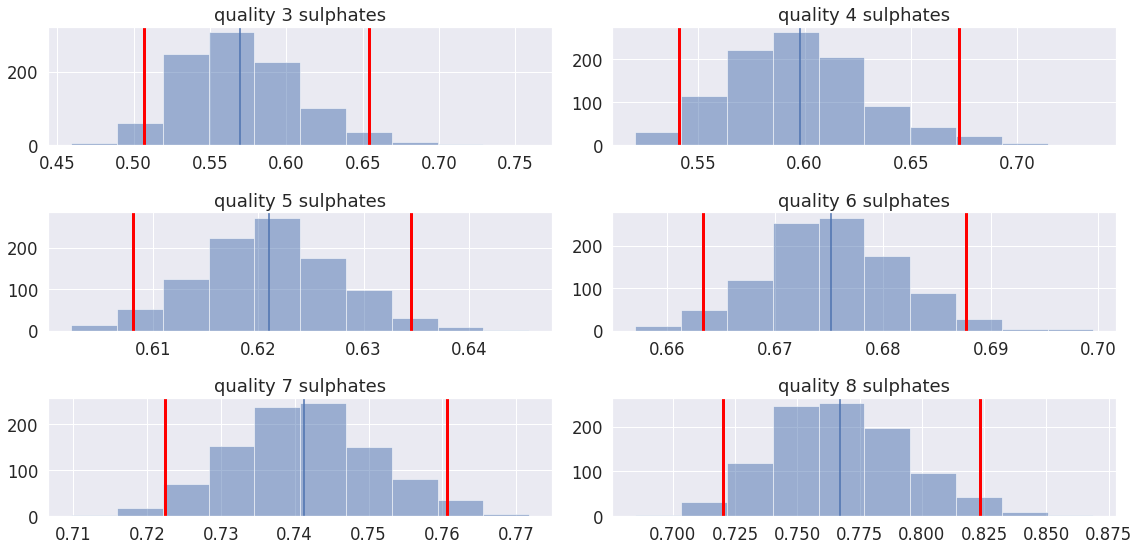

In [ ]:
# 다시 뽑은 1000개의 '평균들에 대한 평균'의 95% 신뢰구간
# 파란색 선 : mean, 빨간색 선 : 신뢰구간 경계선

fig = plt.figure(figsize = (16, 8))

a = quality3_series
b = quality4_series
c = quality5_series
d = quality6_series
e = quality7_series
f = quality8_series

plt.subplot(3, 2, 1) # 행 3개, 열 2개, 1번째 positon
plot_hist(a)
plt.title('quality 3 sulphates')

plt.subplot(3, 2, 2)
plot_hist(b)
plt.title('quality 4 sulphates')

plt.subplot(3, 2, 3)
plot_hist(c)
plt.title('quality 5 sulphates')

plt.subplot(3, 2, 4)
plot_hist(d)
plt.title('quality 6 sulphates')

plt.subplot(3, 2, 5)
plot_hist(e)
plt.title('quality 7 sulphates')

plt.subplot(3, 2, 6)
plot_hist(f)
plt.title('quality 8 sulphates')

plt.tight_layout()
plt.show()
plot_dists(a, b, c, d, e, f, nbins=80)
plt.show()

In [ ]:
# 부트스트랩 평균 (파란색 선)
quality3_series.mean(), quality4_series.mean(), quality5_series.mean(), quality6_series.mean(), quality7_series.mean(), quality8_series.mean()

(0.5696869999999999,
 0.5980354716981133,
 0.620971336270191,
 0.6752031347962385,
 0.7412623115577881,
 0.7672672222222229)

In [ ]:
 # 신뢰구간
print(f'quality3 :{[np.percentile(quality3_series, 2.5), np.percentile(quality3_series, 97.5)]}')
print(f'quality4 :{[np.percentile(quality4_series, 2.5), np.percentile(quality4_series, 97.5)]}')
print(f'quality5 :{[np.percentile(quality5_series, 2.5), np.percentile(quality5_series, 97.5)]}')
print(f'quality6 :{[np.percentile(quality6_series, 2.5), np.percentile(quality6_series, 97.5)]}')
print(f'quality7 :{[np.percentile(quality7_series, 2.5), np.percentile(quality7_series, 97.5)]}')
print(f'quality8 :{[np.percentile(quality8_series, 2.5), np.percentile(quality8_series, 97.5)]}')

quality3 :[0.5069750000000001, 0.6540250000000001]
quality4 :[0.5409386792452829, 0.6724811320754718]
quality5 :[0.6081273861967686, 0.6345433186490453]
quality6 :[0.6633224921630096, 0.6876696708463955]
quality7 :[0.7224108040201006, 0.7606545226130653]
quality8 :[0.7199861111111112, 0.8233472222222222]


    <해설>
    부트스트랩 결과, quality5~6, quality6~7에서 신뢰구간이 겹치지 않는다.
    따라서 이 구간에서는 quality 별 sulphates가 상이하다는 결론이 도출된다.
    또한 이 구간에서 quality가 높아질수록 부트스트랩 평균이 높아진다.
    결론적으로, quality5 ~ quality7에서 quality가 높아질수록 sulphates가 점점 높아진다.

따라서 부트스트랩 결과,

- quality5~7에서 알코올이 높을수록 레드와인 품질이 좋다.
- quality4~7에서 휘발성 산도가 높을수록 레드와인 품질이 좋다.
- quality5~7에서 황산염이 높을수록 레드와인 품질이 좋다.

## 3. 결론

결론적으로,
- 알코올이 높을수록 레드와인 품질은 5~7에서 유의미하게 좋아진다.
- 휘발성 산도가 높을수록 레드와인 품질은 4~7에서 유의미하게 좋아진다.
- 황산염이 높을수록 레드와인 품질은 5~7에서 유의미하게 좋아진다.



즉,
- 알코올, 휘발성 산도, 황산염이 아무리 낮아도 레드와인 품질이 무조건 낮다고 할 수 없으며, 
- 알코올, 휘발성 산도, 황산염이 아무리 높아도 레드와인 품질이 무조건 높다고 할 수 없다.

따라서 레드와인의 품질을 결정짓는 요소는

알코올, 휘발성 산도, 황산염이며

- 알코올 함유량에 따른 레드와인 품질은 5~7 사이에서만 유의미하게 평가할 수 있다.
- 휘발성 산도 함유량에 따른 레드와인 품질은 4~7 사이에서만 유의미하게 평가할 수 있다.
- 황산염 함유량에 따른 레드와인 품질은 5~7 사이에서만 유의미하게 평가할 수 있다.



# 출처

- 코드 참고 웹페이지 출처

1. seaborn.heatmap . (n.d.). https://seaborn.pydata.org/generated/seaborn.heatmap.html.
